# OCR with EasyOCR

- Supported by [Jaided AI](https://jaided.ai/)
- Official repository: https://github.com/JaidedAI/EasyOCR

# Instalation

In [1]:
#!pip install easyocr

In [2]:
#!pip uninstall opencv-python-headless
#!pip install opencv-python-headless==4.1.2.30

In [3]:
from easyocr import Reader
import cv2
from PIL import ImageFont, ImageDraw, Image
import matplotlib.pyplot as plt
import numpy as np

In [4]:
#from google.colab.patches import cv2_imshow
def cv2_imshow(img, to_rgb=True):
    if to_rgb:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # BGR -> RGB
    plt.imshow(img)
    plt.show()

In [5]:
DATA_PATH = "./../material/"

In [6]:
import easyocr

In [7]:
# It is important to have compatible
# OpenCV and EasyOCR versions
print(cv2.__version__)
print(easyocr.__version__)

4.7.0
1.7.0


# Parameters

In [8]:
# We need to specify the languages we have in the image
languages_list = ['en', 'pt']
print(languages_list)

['en', 'pt']


In [9]:
# If we have a GPU, we should use it
gpu = False #True

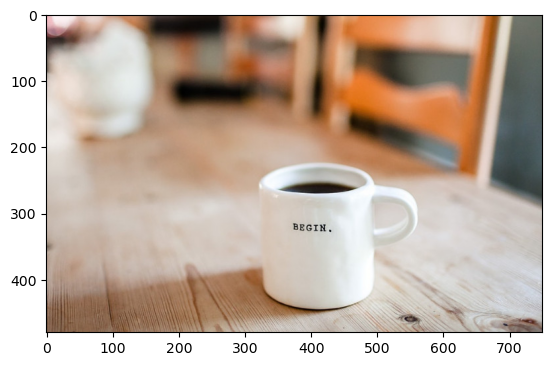

In [10]:
img = cv2.imread(DATA_PATH+'Images/cup.jpg')
cv2_imshow(img)

In [11]:
original = img.copy()

# Text recognition

In [12]:
# We see we need 2 models: detection & recognition
# The inference is very easy: we pass the parameters to the Reader
# and then we call readtext()
# Note: we can get more than one box
reader = Reader(languages_list, gpu)
results = reader.readtext(img)

Using CPU. Note: This module is much faster with a GPU.


In [13]:
# The results object is a list of tuples
# Each tuple has:
# - The bounding box coordinates: [lt, rt, br, bl]
# - The text/string
# - The confidence
results

[([[373, 313], [435, 313], [435, 331], [373, 331]],
  'BEGIN .',
  0.6404372122231472)]

# Writing the results

## Text

In [14]:
# We use the Calibri font to display text on the image.
# We do it so, because Calibri has many symbols
font = DATA_PATH+'Fonts/calibri.ttf'

In [15]:
def write_text(text, x, y, img, font, color=(50,50,255), font_size=22):
    font = ImageFont.truetype(font, font_size)
    img_pil = Image.fromarray(img)
    draw = ImageDraw.Draw(img_pil)
    draw.text((x, y - font_size), text, font = font, fill = color)
    img = np.array(img_pil)
    return img

## Bouding box

* **lt** = left top
* **rt** = rigth top
* **br** = bottom right
* **bl** = bottom left 

In [16]:
def box_coordinates(box):
    # We need to convert the row/col values to ints
    # and they are additionally packed into a tuple
    (lt, rt, br, bl) = box
    lt = (int(lt[0]), int(lt[1]))
    rt = (int(rt[0]), int(rt[1]))
    br = (int(br[0]), int(br[1]))
    bl = (int(bl[0]), int(bl[1]))
    
    return lt, rt, br, bl

In [17]:
# First box, bbox coordinates
results[0][0]

[[373, 313], [435, 313], [435, 331], [373, 331]]

In [18]:
# First box, bbox coordinates - but converted to a tuple of ints
box_coordinates(results[0][0])

((373, 313), (435, 313), (435, 331), (373, 331))

In [19]:
def draw_img(img, lt, br, color=(200,255,0), thickness=2):
    # NOTE: we need only LT and BR for the bbox
    cv2.rectangle(img, lt, br, color, thickness)
    
    return img

[[373, 313], [435, 313], [435, 331], [373, 331]] BEGIN . 0.6404372122231472


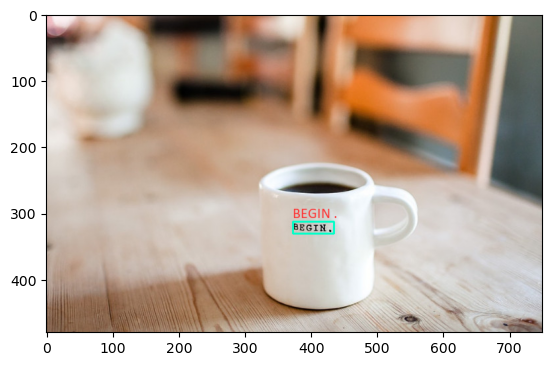

In [20]:
img = original.copy()
for (box, text, probability) in results:
    print(box, text, probability)
    lt, rt, br, bl = box_coordinates(box)
    # NOTE: we need only LT and BR for the bbox
    img = draw_img(img, lt, br)
    img = write_text(text, lt[0], lt[1], img, font)

cv2_imshow(img)

In [21]:
# Another example with a photo
img = cv2.imread(DATA_PATH+'Images/google-cloud.jpg')
reader = Reader(languages_list, gpu)
results = reader.readtext(img)
results

Using CPU. Note: This module is much faster with a GPU.


[([[908, 412], [1032, 412], [1032, 468], [908, 468]],
  '1170',
  0.8067051768302917),
 ([[566, 454], [845, 454], [845, 520], [566, 520]],
  'Google Cloud',
  0.9970841919985463)]

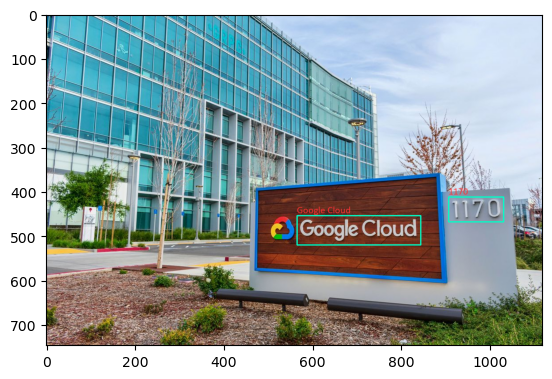

In [22]:
for (box, text, probability) in results:
    lt, rt, br, bl = box_coordinates(box)
    img = draw_img(img, lt, br)
    img = write_text(text, lt[0], lt[1], img, font)

cv2_imshow(img)

# Other languages

- Documentation: https://www.jaided.ai/easyocr/

In [23]:
# Supported languages
# https://www.jaided.ai/easyocr/
# German: 'de'
# Spanish: 'es'
# ...
# All languages in the list will be detected
languages_list = ['en','fr']
languages_list

['en', 'fr']

In [24]:
img = cv2.imread(DATA_PATH+'Images/french.jpg')
reader = Reader(languages_list, gpu)
results = reader.readtext(img)
results

Using CPU. Note: This module is much faster with a GPU.


[([[216, 122], [370, 122], [370, 170], [216, 170]],
  'Mairie du /"',
  0.8551353610599306),
 ([[257, 222], [378, 222], [378, 272], [257, 272]],
  '[Palais du',
  0.9349514190923051),
 ([[242, 322], [515, 322], [515, 376], [242, 376]],
  'LES ARTS DÉCORATIFS',
  0.985739387208102),
 ([[262, 440], [481, 440], [481, 492], [262, 492]],
  'Musée du LOUVRE',
  0.994997176401167),
 ([[197, 537], [282, 537], [282, 577], [197, 577]],
  'Théâtre',
  0.999654574722221),
 ([[195, 569], [377, 569], [377, 613], [195, 613]],
  'du PaLAIS-RoyAL',
  0.2672544317457907),
 ([[377.02985749985464, 236.11942999941868],
   [475.90943152163265, 248.1536282272754],
   [468.97014250014536, 283.8805700005813],
   [371.09056847836735, 270.8463717727246]],
  'LOUVRE',
  0.9941192770303641)]

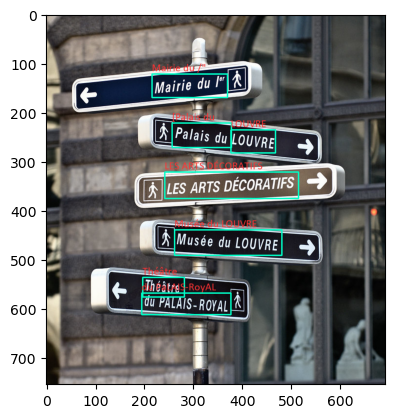

In [25]:
for (box, text, probability) in results:
    lt, rt, br, bl = box_coordinates(box)
    img = draw_img(img, lt, br)
    img = write_text(text, lt[0], lt[1], img, font)

cv2_imshow(img)

In [26]:
# Another image with other languages
languages_list = ['en', 'ch_sim']
languages_list

['en', 'ch_sim']

In [27]:
font = DATA_PATH+'Fonts/simsun.ttc'

In [28]:
img = cv2.imread(DATA_PATH+'Images/chinese.jpg')
reader = Reader(languages_list, gpu)
results = reader.readtext(img)
results

Using CPU. Note: This module is much faster with a GPU.


[([[86, 80], [134, 80], [134, 128], [86, 128]], '西', 0.8046870878482402),
 ([[187, 75], [469, 75], [469, 165], [187, 165]], '愚园路', 0.961498744742133),
 ([[517, 81], [565, 81], [565, 123], [517, 123]], '东', 0.9945212748108503),
 ([[78, 126], [136, 126], [136, 156], [78, 156]], '315', 0.9999931862770842),
 ([[514, 124], [574, 124], [574, 156], [514, 156]], '309', 0.9923930764198303),
 ([[81, 175], [125, 175], [125, 211], [81, 211]], 'I', 0.933676387736714),
 ([[227, 174], [351, 174], [351, 218], [227, 218]],
  'Yuyuan',
  0.9889178748638917),
 ([[360, 176], [412, 176], [412, 208], [360, 208]], 'Rd_', 0.9809226549403477),
 ([[529, 173], [569, 173], [569, 213], [529, 213]], 'E', 0.42125375159338674)]

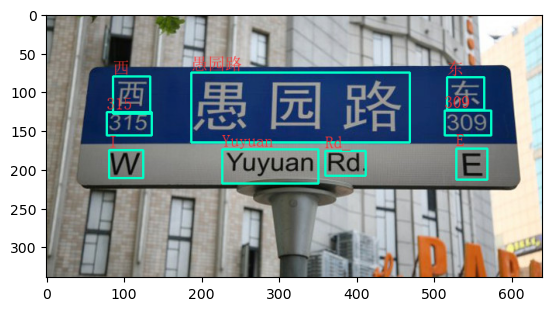

In [29]:
for (box, text, probability) in results:
    lt, rt, br, bl = box_coordinates(box)
    img = draw_img(img, lt, br)
    img = write_text(text, lt[0], lt[1], img, font)

cv2_imshow(img)

# Text with background

In [30]:
def text_background(text, x, y, img, font, font_size=32, color=(200,255,0)):
    # A label/strip with a given color is created on the given coordinates
    # to put the detected text string on there
    background = np.full((img.shape), (0,0,0), dtype=np.uint8)
    text_back = write_text(text, x, y, background, font, font_size=font_size)
    text_back = cv2.dilate(text_back, (np.ones((3,5), np.uint8)))
    fx, fy, fw, fh = cv2.boundingRect(text_back[:,:,2])
    cv2.rectangle(img, (fx, fy), (fx + fw, fy + fh), color, -1)

    return img

In [31]:
font = DATA_PATH+'Fonts/calibri.ttf'
languages_list = ['en', 'pt']

In [32]:
img = cv2.imread(DATA_PATH+'Images/plate-information.jpg')
reader = Reader(languages_list, gpu)
results = reader.readtext(img)
results

Using CPU. Note: This module is much faster with a GPU.


[([[260, 164], [302, 164], [302, 196], [260, 196]], '310', 0.9998774915879793),
 ([[344, 184], [368, 184], [368, 212], [344, 212]], 'i', 0.6660502469984841),
 ([[134, 262], [180, 262], [180, 290], [134, 290]],
  'Cine',
  0.9995354413986206),
 ([[304.07944680100655, 128.69533616120788],
   [366.51745895966945, 117.36831363725129],
   [369.92055319899345, 145.30466383879212],
   [307.48254104033055, 155.6316863627487]],
  'União',
  0.9999783552942619),
 ([[202.01488842937005, 155.701488842937],
   [304.70640266490693, 133.705633508088],
   [309.98511157062995, 157.298511157063],
   [207.29359733509307, 180.294366491912]],
  'Ferroviária',
  0.9996347037849321),
 ([[132.65739357167092, 171.12591485733674],
   [208.5373938916925, 155.3994900067786],
   [214.34260642832908, 182.87408514266326],
   [138.4626061083075, 199.6005099932214]],
  'Estação',
  0.9999656214125782),
 ([[183.7701175612585, 185.99310580513264],
   [261.70640266490693, 174.705633508088],
   [265.2298824387415, 199.006

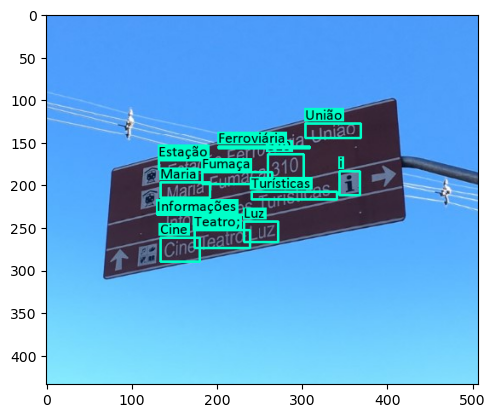

In [33]:
for (box, text, probability) in results:
    lt, rt, br, bl = box_coordinates(box)
    img = draw_img(img, lt, br, (200,255,0))
    img = text_background(text, lt[0], lt[1], img, font, 18, (200,255,0))
    img = write_text(text, lt[0], lt[1], img, font, (0,0,0), 18)

cv2_imshow(img)